In [7]:
#imports
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from helpers.products import Products
from directed_graph_generators.directed_tree import DirectedTree
from directed_graph_generators.lattice import DirectedLattice
from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel
from directed_graph_generators.directed_erdos_renyi import DirectedErdosRenyi

from clustering_algorithms.exponential_clustering import Exponential_Clustering, Exponential_Clustering_no_evecs
from clustering_algorithms.zanetti_clustering import DSBM_Clustering_Zanetti

from helpers.get_hermitian_adjacency_matrix import get_hermitian_adjacency_matrix
from helpers.deduce_metagraph import deduce_metagraph

Using similar graph structures from before but with $p \approx 4/n$ and we introduce L(n) as a lattice of n vertices (NOTE: n must be a square number) and S(n) as a star graph of n vertices.
$$F_1 = \begin{pmatrix}
G(n,p) & G(n,q) & 0 & 0 \\
0 & G(n,p) & G(n,q) & 0 \\
0 & 0 & G(n,p) & G(n,q) \\
G(n,q) & 0 & 0 & G(n,p) \\
\end{pmatrix},
\
L_1 = \begin{pmatrix}
L(n) & G(n,q) & 0 & 0 \\
0 & L(n) & G(n,q) & 0 \\
0 & 0 & L(n) & G(n,q) \\
G(n,q) & 0 & 0 & L(n) \\
\end{pmatrix}
\
S_1 = \begin{pmatrix}
S(n) & G(n,q) & 0 & 0 \\
0 & S(n) & G(n,q) & 0 \\
0 & 0 & S(n) & G(n,q) \\
G(n,q) & 0 & 0 & S(n) \\
\end{pmatrix}
$$
$$
F_2 = \begin{pmatrix}
G(n,p) & G(n,q) & G(n,q) & 0 \\
0 & G(n,p) & G(n,q) & 0 \\
0 & 0 & G(n,p) & 0 \\
G(n,q) & 0 & 0 & G(n,p) \\
\end{pmatrix},
\
L_2 = \begin{pmatrix}
L(n) & G(n,q) & G(n,q) & 0 \\
0 & L(n) & G(n,q) & 0 \\
0 & 0 & L(n) & 0 \\
G(n,q) & 0 & 0 & L(n) \\
\end{pmatrix}
\
S_2 = \begin{pmatrix}
S(n) & G(n,q) & G(n,q) & 0 \\
0 & S(n) & G(n,q) & 0 \\
0 & 0 & S(n) & 0 \\
G(n,q) & 0 & 0 & S(n) \\
\end{pmatrix}
$$

$$F_3 = \begin{pmatrix}
G(n,p) & G(n,q) & 0 & 0 & 0 & 0 \\
0 & G(n,p) & G(n,q) & 0 & 0 & 0 \\
G(n,q) & 0 & G(n,p) & G(n,q) & 0 & 0 \\
0 & 0 & 0 & G(n,p) & G(n,q) & 0 \\
0 & 0 & 0 & 0 & G(n,p) & G(n,q) \\
0 & 0 & 0 & G(n,q) & 0 & G(n,p) \\
\end{pmatrix},
\
L_3 = \begin{pmatrix}
L(n) & G(n,q) & 0 & 0 & 0 & 0 \\
0 & L(n) & G(n,q) & 0 & 0 & 0 \\
G(n,q) & 0 & L(n) & G(n,q) & 0 & 0 \\
0 & 0 & 0 & L(n) & G(n,q) & 0 \\
0 & 0 & 0 & 0 & L(n) & G(n,q) \\
0 & 0 & 0 & G(n,q) & 0 & L(n) \\
\end{pmatrix},
\
S_3 = \begin{pmatrix}
S(n) & G(n,q) & 0 & 0 & 0 & 0 \\
0 & S(n) & G(n,q) & 0 & 0 & 0 \\
G(n,q) & 0 & S(n) & G(n,q) & 0 & 0 \\
0 & 0 & 0 & S(n) & G(n,q) & 0 \\
0 & 0 & 0 & 0 & S(n) & G(n,q) \\
0 & 0 & 0 & G(n,q) & 0 & S(n) \\
\end{pmatrix}
$$

$$F_4 = \begin{pmatrix}
G(n,p) & G(n,q) & G(n,q) & G(n,q) & G(n,q) \\
0 & G(n,p) & G(n,q) & 0 & 0 \\
0 & 0 & G(n,p) & G(n,q) & 0 \\
0 & 0 & 0 & G(n,p) & G(n,q) \\
0 & 0 & 0 & 0 & G(n,p)
\end{pmatrix},
\
L_4 = \begin{pmatrix}
L(n) & G(n,q) & G(n,q) & G(n,q) & G(n,q) \\
0 & L(n) & G(n,q) & 0 & 0 \\
0 & 0 & L(n) & G(n,q) & 0 \\
0 & 0 & 0 & L(n) & G(n,q) \\
0 & 0 & 0 & 0 & L(n)
\end{pmatrix},
\
S_4 = \begin{pmatrix}
S(n) & G(n,q) & G(n,q) & G(n,q) & G(n,q) \\
0 & S(n) & G(n,q) & 0 & 0 \\
0 & 0 & S(n) & G(n,q) & 0 \\
0 & 0 & 0 & S(n) & G(n,q) \\
0 & 0 & 0 & 0 & S(n)
\end{pmatrix}
$$



In [8]:
# Im aware I dont need 0.5 on the diagonal as we take the hermitian adj matrix
F_1 = np.array([[0.5, 1.0, 0.0, 0.0], 
                [0.0, 0.5, 1.0, 0.0], 
                [0.0, 0.0, 0.5, 1.0], 
                [1.0, 0.0, 0.0, 0.5]])
F_2 = np.array([[0.5, 1.0, 1.0, 0.0], 
                [0.0, 0.5, 1.0, 0.0], 
                [0.0, 0.0, 0.5, 1.0], 
                [1.0, 0.0, 0.0, 0.5]])
F_3 = np.array([[0.5, 1.0, 0.0, 0.0, 0.0, 0.0], 
                [0.0, 0.5, 1.0, 0.0, 0.0, 0.0], 
                [1.0, 0.0, 0.5, 1.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.5, 1.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.5, 1.0],
                [0.0, 0.0, 0.0, 1.0, 0.0, 0.5]])
F_4 = np.array([[0.5, 1.0, 1.0, 1.0, 1.0],
                [0.0, 0.5, 1.0, 0.0, 0.0],
                [0.0, 0.0, 0.5, 1.0, 0.0],
                [0.0, 0.0, 0.0, 0.5, 1.0],
                [0.0, 0.0, 0.0, 0.0, 0.5],])
                
F_1_herm = get_hermitian_adjacency_matrix(F_1, normalize=True)
F_2_herm = get_hermitian_adjacency_matrix(F_2, normalize=True)
F_3_herm = get_hermitian_adjacency_matrix(F_3, normalize=True)
F_4_herm = get_hermitian_adjacency_matrix(F_4, normalize=True)

# Taking a quick look at the rank of each of these matrices
print('rank of F_1_herm is: ', np.linalg.matrix_rank(F_1_herm), ' dimension of F_1_herm is: ', F_1_herm.shape[0])
print('rank of F_2_herm is: ', np.linalg.matrix_rank(F_2_herm), ' dimension of F_2_herm is: ', F_2_herm.shape[0])
print('rank of F_3_herm is: ', np.linalg.matrix_rank(F_3_herm), ' dimension of F_3_herm is: ', F_3_herm.shape[0])
print('rank of F_4_herm is: ', np.linalg.matrix_rank(F_4_herm), ' dimension of F_4_herm is: ', F_4_herm.shape[0])

rank of F_1_herm is:  2  dimension of F_1_herm is:  4
rank of F_2_herm is:  2  dimension of F_2_herm is:  4
rank of F_3_herm is:  6  dimension of F_3_herm is:  6
rank of F_4_herm is:  4  dimension of F_4_herm is:  5


In [9]:
# function to construct adjacency matrix from F, n, p and q
def construct_graph_from_F(n,F,p,q):
    K = F.shape[0]
    N = K*n
    A = np.zeros((N,N))
    for k_1 in range(K):
        for k_2 in range(K):
            if F[k_1,k_2] == 0.5:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = np.random.binomial(1,p,size=(n,n))
            elif F[k_1,k_2] == 1.0:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = np.random.binomial(1,q,size=(n,n))
    return A

# function to construct hermitian adjacency matrix from F, n, q with Lattice clusters
def construct_graph_from_F_lattices(n,F,q):
    K = F.shape[0]
    N = K*n
    A = np.zeros((N,N))
    length = int(np.sqrt(n))
    for k_1 in range(K):
        for k_2 in range(K):
            if F[k_1,k_2] == 0.5:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = DirectedLattice(length,length).adjacency_matrix
            elif F[k_1,k_2] == 1.0:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = np.random.binomial(1,q,size=(n,n))
    return A

# function to construct hermitian adjacency matrix from F, n, q with Tree clusters
def construct_graph_from_F_stars(n,F,q):
    K = F.shape[0]
    N = K*n
    A = np.zeros((N,N))
    for k_1 in range(K):
        for k_2 in range(K):
            if F[k_1,k_2] == 0.5:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = DirectedTree(n,n).adjacency_matrix
            elif F[k_1,k_2] == 1.0:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = np.random.binomial(1,q,size=(n,n))
    return A

# function to construct hermitian adjacency matrix from F, n, q with complete directed graph clusters (upper triangular matrix of ones)
def construct_graph_from_F_complete(n,F,q):
    K = F.shape[0]
    N = K*n
    A = np.zeros((N,N))
    for k_1 in range(K):
        for k_2 in range(K):
            if F[k_1,k_2] == 0.5:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = np.triu(np.ones((n,n)),k=1)
            elif F[k_1,k_2] == 1.0:
                A[k_1*n:(k_1+1)*n,k_2*n:(k_2+1)*n] = np.random.binomial(1,q,size=(n,n))
    return A

In [10]:
cluster_names = ['G(n,p)', 'Lattice', 'Stars','Complete']
number_of_graphs = 4
p = 0.04
q = 0.04

We now generate each of the graphs with cluster sizes of $n=100$ with each of the three different cluster types. $p=q=0.04$ which *roughly* gives the same degree in the $G(100,0.04)$ as in the Lattices.

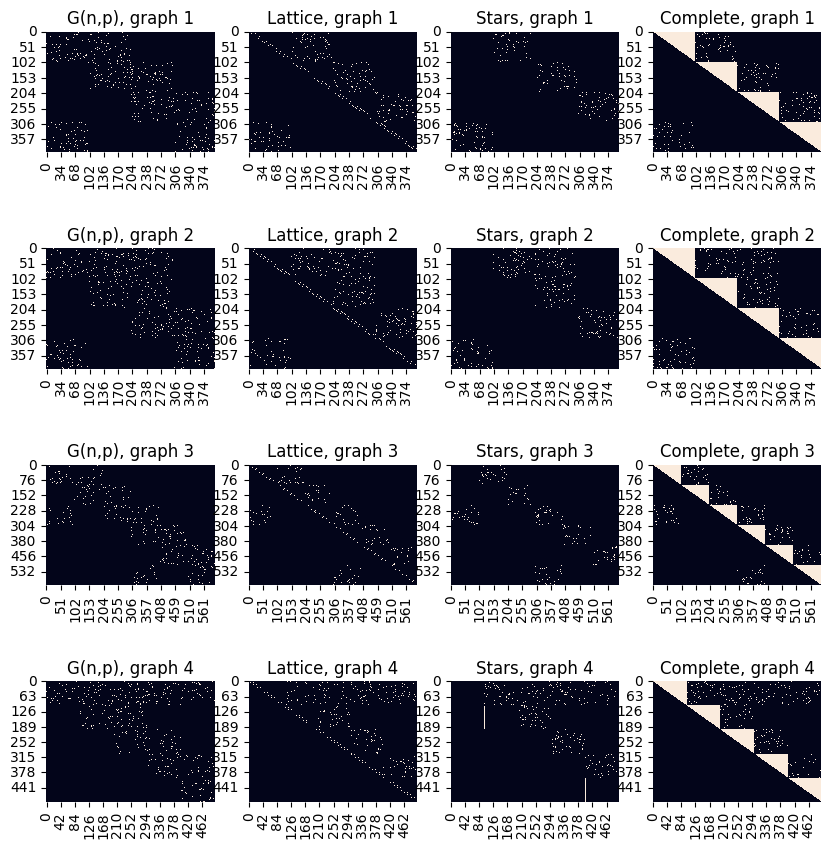

In [11]:
# We will make some adjacnecy matrices from each F to see what they look like
p=0.04
q=0.04
A_1 = construct_graph_from_F(100,F_1,p,q)
A_2 = construct_graph_from_F(100,F_2,p,q)
A_3 = construct_graph_from_F(100,F_3,p,q)
A_4 = construct_graph_from_F(100,F_4,p,q)

#Making same adjacency matrices but with lattices instead of random graphs for clusters
A_1_lattice = construct_graph_from_F_lattices(100,F_1,q)
A_2_lattice = construct_graph_from_F_lattices(100,F_2,q)
A_3_lattice = construct_graph_from_F_lattices(100,F_3,q)
A_4_lattice = construct_graph_from_F_lattices(100,F_4,q)

#Making same adjacency matrices but with stars instead of random graphs for clusters
A_1_stars = construct_graph_from_F_stars(100,F_1,q)
A_2_stars = construct_graph_from_F_stars(100,F_2,q)
A_3_stars = construct_graph_from_F_stars(100,F_3,q)
A_4_stars = construct_graph_from_F_stars(100,F_4,q)

#Making same adjacency matrices but with complete graphs instead of random graphs for clusters
A_1_complete = construct_graph_from_F_complete(100,F_1,0.8)
A_2_complete = construct_graph_from_F_complete(100,F_2,0.8)
A_3_complete = construct_graph_from_F_complete(100,F_3,0.8)
A_4_complete = construct_graph_from_F_complete(100,F_4,0.8)

adjacency_matrix_dict = {'G(n,p)':[A_1,A_2,A_3,A_4], 'Lattice':[A_1_lattice,A_2_lattice,A_3_lattice,A_4_lattice], 'Stars':[A_1_stars,A_2_stars,A_3_stars,A_4_stars], 'Complete':[A_1_complete,A_2_complete,A_3_complete,A_4_complete]}
# 4 subplots of heatmaps

fig, axs = plt.subplots(4, 4, figsize=(10,10))
plt.subplots_adjust(hspace = 0.8)

for graph_cluster_type in cluster_names:
    for i, A in enumerate(adjacency_matrix_dict[graph_cluster_type]):
        if graph_cluster_type == 'G(n,p)':
            sns.heatmap(A, ax=axs[i,0], cbar=False)
            axs[i,0].set_title('G(n,p), graph ' + str(i+1))
        elif graph_cluster_type == 'Lattice':
            sns.heatmap(A, ax=axs[i,1], cbar=False)
            axs[i,1].set_title('Lattice, graph ' + str(i+1))
        elif graph_cluster_type == 'Stars':
            sns.heatmap(A, ax=axs[i,2], cbar=False)
            axs[i,2].set_title('Stars, graph ' + str(i+1))
        elif graph_cluster_type == 'Complete':
            sns.heatmap(A, ax=axs[i,3], cbar=False)
            axs[i,3].set_title('Complete, graph ' + str(i+1))

We now plot the first 4 eigenvectors of these graphs on separate subplots (like in previous experiments). I have highlighted the subplot title in red if it is the eigenvector that we expect to be the inner expansion of the clusters based on the previous notebook.

In [13]:
# make hermitian adjacency matrices
A_1_herm = get_hermitian_adjacency_matrix(A_1, normalize=True)
A_2_herm = get_hermitian_adjacency_matrix(A_2, normalize=True)
A_3_herm = get_hermitian_adjacency_matrix(A_3, normalize=True)
A_4_herm = get_hermitian_adjacency_matrix(A_4, normalize=True)

A_1_lattice_herm = get_hermitian_adjacency_matrix(A_1_lattice, normalize=True)
A_2_lattice_herm = get_hermitian_adjacency_matrix(A_2_lattice, normalize=True)  
A_3_lattice_herm = get_hermitian_adjacency_matrix(A_3_lattice, normalize=True)
A_4_lattice_herm = get_hermitian_adjacency_matrix(A_4_lattice, normalize=True)

A_1_stars_herm = get_hermitian_adjacency_matrix(A_1_stars, normalize=True)
A_2_stars_herm = get_hermitian_adjacency_matrix(A_2_stars, normalize=True)
A_3_stars_herm = get_hermitian_adjacency_matrix(A_3_stars, normalize=True)
A_4_stars_herm = get_hermitian_adjacency_matrix(A_4_stars, normalize=True)

A_1_complete_herm = get_hermitian_adjacency_matrix(A_1_complete, normalize=True)
A_2_complete_herm = get_hermitian_adjacency_matrix(A_2_complete, normalize=True)
A_3_complete_herm = get_hermitian_adjacency_matrix(A_3_complete, normalize=True)
A_4_complete_herm = get_hermitian_adjacency_matrix(A_4_complete, normalize=True)

# get eigenvectors and eigenvalues
hermitian_adjacency_matrix_dict = {'G(n,p)':[A_1_herm,A_2_herm,A_3_herm,A_4_herm], 
                                    'Lattice':[A_1_lattice_herm,A_2_lattice_herm,A_3_lattice_herm,A_4_lattice_herm], 
                                    'Stars':[A_1_stars_herm,A_2_stars_herm,A_3_stars_herm,A_4_stars_herm],
                                    'Complete':[A_1_complete_herm,A_2_complete_herm,A_3_complete_herm,A_4_complete_herm]}
eigenvectors_dict = {}
eigenvalues_dict = {}
for graph_cluster_type in cluster_names:
    eigenvectors_dict[graph_cluster_type] = []
    eigenvalues_dict[graph_cluster_type] = []
    for i, A in enumerate(hermitian_adjacency_matrix_dict[graph_cluster_type]):
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvalues = np.real(eigenvalues)
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]
        eigenvectors_dict[graph_cluster_type].append(eigenvectors)
        eigenvalues_dict[graph_cluster_type].append(eigenvalues)


In [14]:
#defining clusters for each of the graphs and dictionary of cluster colors/ eigenvectors for ease in plotting
clusters_A_1 = [0]*100 + [1]*100 + [2]*100 + [3]*100
clusters_A_2 = [0]*100 + [1]*100 + [2]*100 + [3]*100
clusters_A_3 = [0]*100 + [1]*100 + [2]*100 + [3]*100 + [4]*100 + [5]*100
clusters_A_4 = [0]*100 + [1]*100 + [2]*100 + [3]*100 + [4]*100
cluster_colors = {0:clusters_A_1, 1:clusters_A_2, 2:clusters_A_3, 3:clusters_A_4}
cluster_expansions = [(0,1),(1,1),(2,3),(3,2)]

In [17]:
# plot first 4 eigenvectors for each graph (4 x 4 subplots)
num_cols = 16
num_rows = 4
num_eigenvectors = 4
num_graphs = 4


subplot_titles =[]

for eigenvector_number in range(num_eigenvectors):
    for i, graph_cluster_type in enumerate(cluster_names):
        for graph_number in range(num_graphs):
            subplot_titles.append(f'{graph_cluster_type}, <br> eigenvector:{eigenvector_number+1}, <br> Graph {graph_number+1}')

fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=(subplot_titles),column_widths=[20]*num_cols, row_heights=[20]*num_rows)
fig.update_annotations(dict(font=dict(size=10)))
fig.update_layout(height=1800, width=2200, title_text=f"First Eigenvectors of adjacency matrices", showlegend=False)
for i, graph_cluster_type in enumerate(cluster_names):
    for eigenvector_number in range(num_eigenvectors):
        for graph_number in range(num_graphs):
            eigenvector = eigenvectors_dict[graph_cluster_type][graph_number][:,eigenvector_number]
            fig.add_trace(go.Scatter(x=np.real(eigenvector), y=np.imag(eigenvector), mode='markers', marker=dict(color=cluster_colors[graph_number])), row=eigenvector_number+1, col=num_rows*i+1+graph_number)
            # make subtitle red
            g_and_evec = (graph_number, eigenvector_number)
            if g_and_evec in cluster_expansions:
                fig['layout']['annotations'][(eigenvector_number)*num_cols + num_rows*i+graph_number].update(dict(font=dict(color='red')))
fig.show()

What looks particularly interesting is the eigenvectors for Graph 1 with star clusters. Indeed, with the star clusters, we see these stray points for all graph types corresponding to each cluster. These are likely the points corresponding to the central nodes of the stars.